# **Question 1**

Check out the Jupyter notebook for Chapter 3 at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter03_introduction-to-keras-and-tf.ipynb. Then, use the "GraidentTape API" to find the derivative of the function f(x) = sin(x) for x = 0, 0.1, 0.2 and 0.3. Submit your Jupyter notebook that shows both the code and the result you got.

# **Answer 1**

In [ ]:
import tensorflow as tf

In [ ]:
def func_gradient(value):
  value_n=tf.Variable(value,dtype=tf.float16)
  with tf.GradientTape() as tape:
    y=tf.sin(value_n)
  grad_y_wrt_x=tape.gradient(y,value_n)
  print(grad_y_wrt_x)

In [ ]:
func_gradient(0.0)

tf.Tensor(1.0, shape=(), dtype=float16)


In [ ]:
func_gradient(0.1)

tf.Tensor(0.995, shape=(), dtype=float16)


In [ ]:
func_gradient(0.2)

tf.Tensor(0.98, shape=(), dtype=float16)


In [ ]:
func_gradient(0.3)

tf.Tensor(0.955, shape=(), dtype=float16)


# **Question 2**

Check out the Jupyter notebook for Chapter 4 at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb. Then, for the task "Classifying movie reviews: A binary classification example", tune the hyper-parameters of the model (such as changing the number of layers, changing the sizes of layers, changing the optimizer, changing the learning rate, etc.), and see if you can improve the model's performance. Submit a Jupyter notebook where you clearly show the code with the best hyper-parameters that you have found, along with its performance on training, validation and test sets.

# **Answer 2**

So I have tried various optimizations and changed hyperparameters while model building. I have tried 4-5 models with different variations and to see if it gives better training accuracy and lesser training loss. Test accuracy along with Validation and test loss are also printed.


In the end, the summary of all the model accuracies is given.

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])


1641221/1641221 [==============================] - 0s 0us/step


### Preparing the data

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Building your model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

Model 1 same as of code

In [ ]:
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict1 = history1.history
history_dict1.keys()

Epoch 1/10
30/30 [==============================] - 3s 69ms/step - loss: 0.5474 - accuracy: 0.7695 - val_loss: 0.4173 - val_accuracy: 0.8595
Epoch 2/10
30/30 [==============================] - 1s 41ms/step - loss: 0.3397 - accuracy: 0.8932 - val_loss: 0.3253 - val_accuracy: 0.8786
Epoch 3/10
30/30 [==============================] - 1s 40ms/step - loss: 0.2562 - accuracy: 0.9179 - val_loss: 0.2917 - val_accuracy: 0.8858
Epoch 4/10
30/30 [==============================] - 1s 39ms/step - loss: 0.2069 - accuracy: 0.9321 - val_loss: 0.3190 - val_accuracy: 0.8707
Epoch 5/10
30/30 [==============================] - 1s 40ms/step - loss: 0.1737 - accuracy: 0.9428 - val_loss: 0.2768 - val_accuracy: 0.8906
Epoch 6/10
30/30 [==============================] - 1s 41ms/step - loss: 0.1477 - accuracy: 0.9535 - val_loss: 0.3079 - val_accuracy: 0.8765
Epoch 7/10
30/30 [==============================] - 1s 39ms/step - loss: 0.1268 - accuracy: 0.9613 - val_loss: 0.3266 - val_accuracy: 0.8781
Epoch 8/10
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

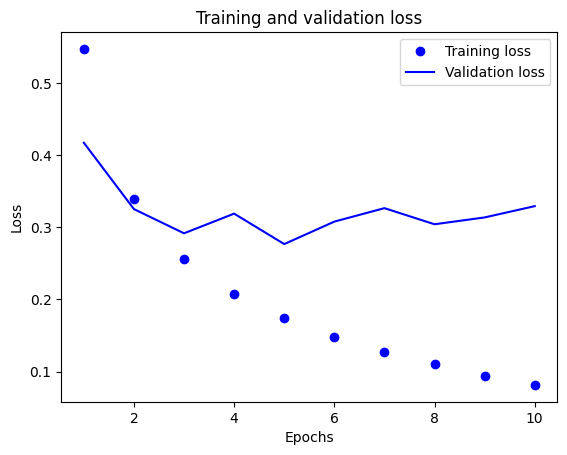

In [ ]:
import matplotlib.pyplot as plt
history_dict1 = history1.history
loss_values = history_dict1["loss"]
val_loss_values = history_dict1["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

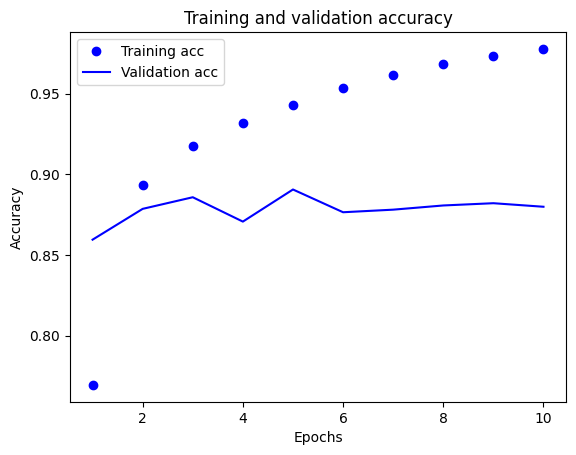

In [ ]:
plt.clf()
acc = history_dict1["accuracy"]
val_acc = history_dict1["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results1 = model1.evaluate(x_test, y_test)
print(results1)
print("Accuracy: %.2f%%" % (results1[1]*100))

782/782 [==============================] - 3s 4ms/step - loss: 0.3554 - accuracy: 0.8708
[0.3554284870624542, 0.8708000183105469]
Accuracy: 87.08%


**Retraining a model from scratch :  Model 2**

Epoch 1/10
30/30 [==============================] - 5s 126ms/step - loss: 0.5366 - accuracy: 0.7248 - val_loss: 0.4356 - val_accuracy: 0.8047
Epoch 2/10
30/30 [==============================] - 4s 127ms/step - loss: 0.3062 - accuracy: 0.8839 - val_loss: 0.3261 - val_accuracy: 0.8640
Epoch 3/10
30/30 [==============================] - 2s 77ms/step - loss: 0.2336 - accuracy: 0.9115 - val_loss: 0.2756 - val_accuracy: 0.8902
Epoch 4/10
30/30 [==============================] - 2s 70ms/step - loss: 0.1852 - accuracy: 0.9308 - val_loss: 0.2765 - val_accuracy: 0.8883
Epoch 5/10
30/30 [==============================] - 2s 66ms/step - loss: 0.1453 - accuracy: 0.9468 - val_loss: 0.2930 - val_accuracy: 0.8862
Epoch 6/10
30/30 [==============================] - 2s 65ms/step - loss: 0.1137 - accuracy: 0.9581 - val_loss: 0.5688 - val_accuracy: 0.8063
Epoch 7/10
30/30 [==============================] - 2s 62ms/step - loss: 0.1011 - accuracy: 0.9659 - val_loss: 0.3271 - val_accuracy: 0.8826
Epoch 8/10


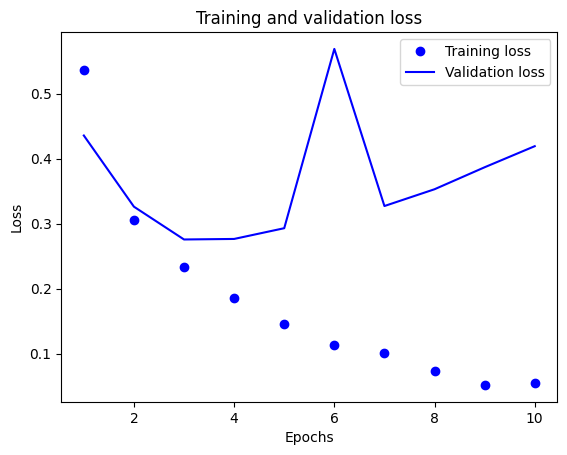

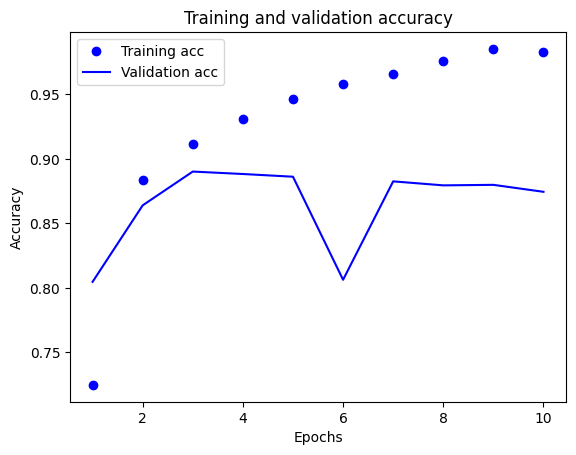

782/782 [==============================] - 3s 4ms/step - loss: 0.4622 - accuracy: 0.8647
[0.46217048168182373, 0.8646799921989441]
Accuracy: 86.47%


In [ ]:
model2 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict2 = history2.history
history_dict2.keys()

import matplotlib.pyplot as plt
history_dict2 = history2.history
loss_values = history_dict2["loss"]
val_loss_values = history_dict2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict2["accuracy"]
val_acc = history_dict2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

results2 = model2.evaluate(x_test, y_test)
print(results2)
print("Accuracy: %.2f%%" % (results2[1]*100))

**Retraining a model from scratch :  Model 3**

Epoch 1/10
30/30 [==============================] - 4s 98ms/step - loss: 0.5517 - accuracy: 0.7286 - val_loss: 0.4993 - val_accuracy: 0.7660
Epoch 2/10
30/30 [==============================] - 2s 74ms/step - loss: 0.3152 - accuracy: 0.8783 - val_loss: 0.3127 - val_accuracy: 0.8706
Epoch 3/10
30/30 [==============================] - 5s 156ms/step - loss: 0.2319 - accuracy: 0.9094 - val_loss: 0.2797 - val_accuracy: 0.8838
Epoch 4/10
30/30 [==============================] - 3s 109ms/step - loss: 0.1829 - accuracy: 0.9316 - val_loss: 0.2941 - val_accuracy: 0.8856
Epoch 5/10
30/30 [==============================] - 2s 74ms/step - loss: 0.1534 - accuracy: 0.9417 - val_loss: 0.3132 - val_accuracy: 0.8813
Epoch 6/10
30/30 [==============================] - 2s 72ms/step - loss: 0.1159 - accuracy: 0.9591 - val_loss: 0.3381 - val_accuracy: 0.8810
Epoch 7/10
30/30 [==============================] - 2s 71ms/step - loss: 0.0929 - accuracy: 0.9708 - val_loss: 0.3733 - val_accuracy: 0.8751
Epoch 8/10


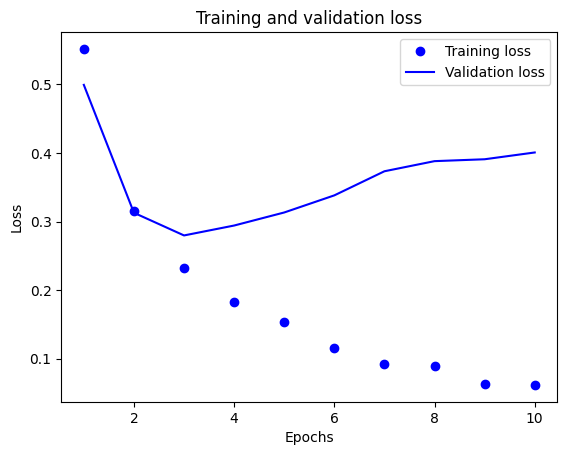

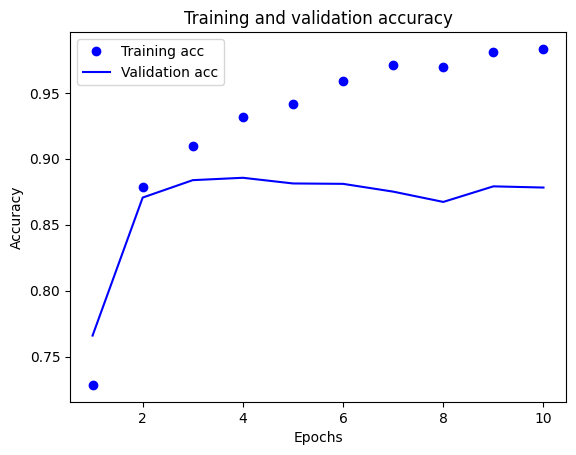

782/782 [==============================] - 3s 4ms/step - loss: 0.4313 - accuracy: 0.8673
[0.43131694197654724, 0.8672800064086914]
Accuracy: 86.73%


In [ ]:
model3 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict3 = history3.history
history_dict3.keys()

import matplotlib.pyplot as plt
history_dict3 = history3.history
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

results3 = model3.evaluate(x_test, y_test)
print(results3)
print("Accuracy: %.2f%%" % (results3[1]*100))

**Retraining a model from scratch :  Model 4**

Epoch 1/10
30/30 [==============================] - 7s 201ms/step - loss: 0.5732 - accuracy: 0.7149 - val_loss: 0.3903 - val_accuracy: 0.8532
Epoch 2/10
30/30 [==============================] - 3s 111ms/step - loss: 0.3374 - accuracy: 0.8714 - val_loss: 0.3629 - val_accuracy: 0.8429
Epoch 3/10
30/30 [==============================] - 3s 100ms/step - loss: 0.2574 - accuracy: 0.8999 - val_loss: 0.2781 - val_accuracy: 0.8883
Epoch 4/10
30/30 [==============================] - 4s 121ms/step - loss: 0.1880 - accuracy: 0.9309 - val_loss: 0.2776 - val_accuracy: 0.8861
Epoch 5/10
30/30 [==============================] - 4s 150ms/step - loss: 0.1620 - accuracy: 0.9377 - val_loss: 0.2948 - val_accuracy: 0.8849
Epoch 6/10
30/30 [==============================] - 5s 172ms/step - loss: 0.1256 - accuracy: 0.9561 - val_loss: 0.4064 - val_accuracy: 0.8522
Epoch 7/10
30/30 [==============================] - 4s 121ms/step - loss: 0.0916 - accuracy: 0.9707 - val_loss: 0.3434 - val_accuracy: 0.8814
Epoch 

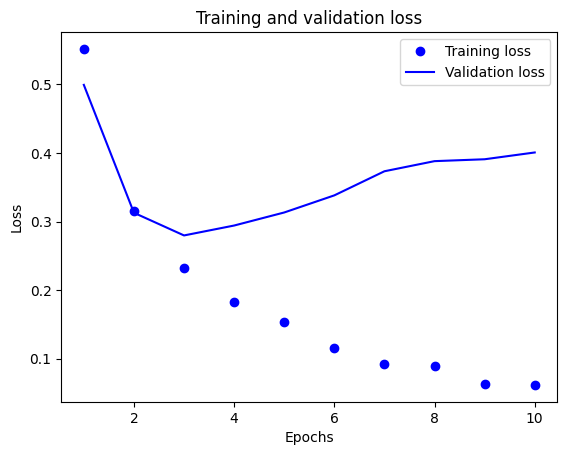

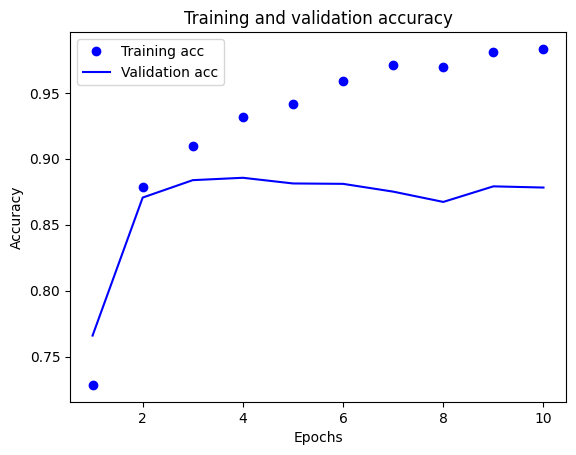

782/782 [==============================] - 5s 6ms/step - loss: 0.4512 - accuracy: 0.8628
[0.4511871933937073, 0.8628000020980835]
Accuracy: 86.28%


In [ ]:
model4 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict4 = history3.history
history_dict4.keys()

import matplotlib.pyplot as plt
history_dict4 = history3.history
loss_values = history_dict4["loss"]
val_loss_values = history_dict4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict4["accuracy"]
val_acc = history_dict4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

results4 = model4.evaluate(x_test, y_test)
print(results4)
print("Accuracy: %.2f%%" % (results4[1]*100))

**Retraining a model from scratch :  Model 5**

Epoch 1/10
30/30 [==============================] - 8s 209ms/step - loss: 0.4043 - accuracy: 0.8147 - val_loss: 0.3205 - val_accuracy: 0.8635
Epoch 2/10
30/30 [==============================] - 5s 174ms/step - loss: 0.1615 - accuracy: 0.9431 - val_loss: 0.3083 - val_accuracy: 0.8807
Epoch 3/10
30/30 [==============================] - 5s 173ms/step - loss: 0.0722 - accuracy: 0.9766 - val_loss: 0.4106 - val_accuracy: 0.8737
Epoch 4/10
30/30 [==============================] - 9s 286ms/step - loss: 0.0263 - accuracy: 0.9903 - val_loss: 0.5802 - val_accuracy: 0.8688
Epoch 5/10
30/30 [==============================] - 4s 149ms/step - loss: 0.0126 - accuracy: 0.9955 - val_loss: 0.7864 - val_accuracy: 0.8666
Epoch 6/10
30/30 [==============================] - 5s 174ms/step - loss: 0.0337 - accuracy: 0.9875 - val_loss: 0.5625 - val_accuracy: 0.8662
Epoch 7/10
30/30 [==============================] - 8s 274ms/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.6546 - val_accuracy: 0.8693
Epoch 

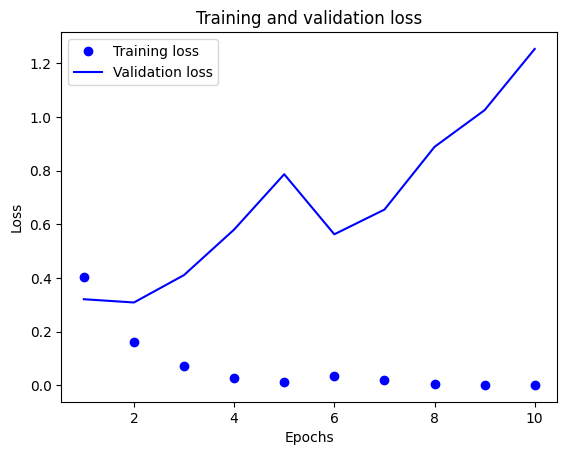

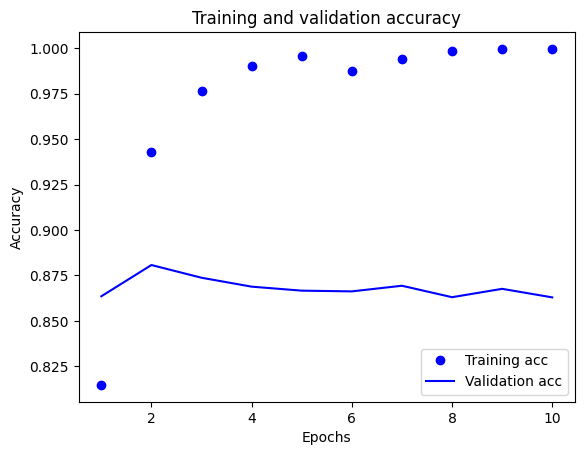

782/782 [==============================] - 6s 8ms/step - loss: 1.3810 - accuracy: 0.8523
[1.38103449344635, 0.8523200154304504]
Accuracy: 85.23%


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(learning_rate=0.003)
model5 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model5.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])
history5 = model5.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict5 = history5.history
history_dict5.keys()

import matplotlib.pyplot as plt
history_dict5 = history5.history
loss_values = history_dict5["loss"]
val_loss_values = history_dict5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict5["accuracy"]
val_acc = history_dict5["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

results5 = model5.evaluate(x_test, y_test)
print(results5)
print("Accuracy: %.2f%%" % (results5[1]*100))

**Retraining a model from scratch :  Model 6**

Epoch 1/10
30/30 [==============================] - 16s 473ms/step - loss: 0.6581 - accuracy: 0.6347 - val_loss: 0.3578 - val_accuracy: 0.8595
Epoch 2/10
30/30 [==============================] - 9s 284ms/step - loss: 0.3452 - accuracy: 0.8575 - val_loss: 0.4503 - val_accuracy: 0.7727
Epoch 3/10
30/30 [==============================] - 7s 224ms/step - loss: 0.2421 - accuracy: 0.9001 - val_loss: 0.2848 - val_accuracy: 0.8848
Epoch 4/10
30/30 [==============================] - 5s 171ms/step - loss: 0.1871 - accuracy: 0.9256 - val_loss: 0.3093 - val_accuracy: 0.8828
Epoch 5/10
30/30 [==============================] - 4s 129ms/step - loss: 0.1509 - accuracy: 0.9372 - val_loss: 0.3158 - val_accuracy: 0.8862
Epoch 6/10
30/30 [==============================] - 4s 122ms/step - loss: 0.0968 - accuracy: 0.9630 - val_loss: 0.3600 - val_accuracy: 0.8816
Epoch 7/10
30/30 [==============================] - 4s 122ms/step - loss: 0.0812 - accuracy: 0.9692 - val_loss: 0.4083 - val_accuracy: 0.8649
Epoch

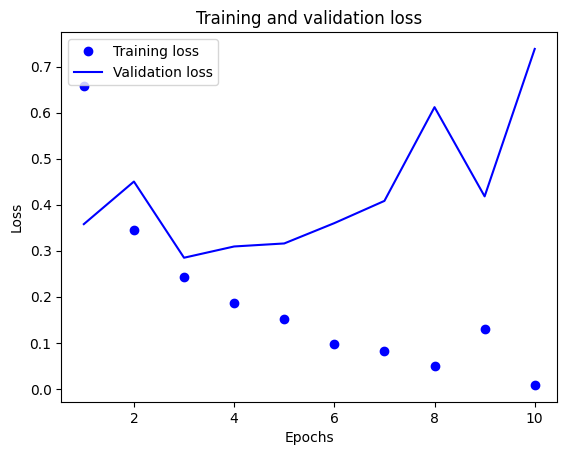

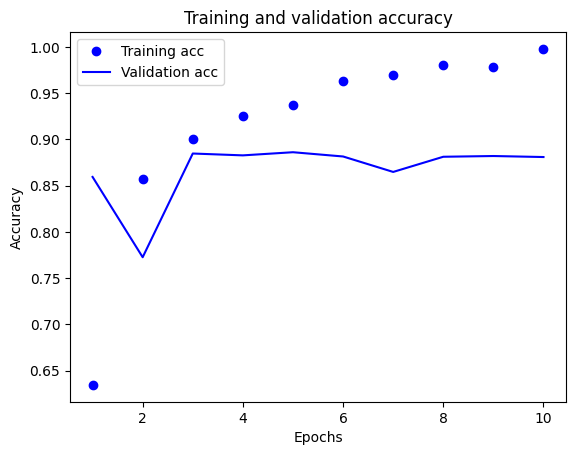

782/782 [==============================] - 5s 6ms/step - loss: 0.7911 - accuracy: 0.8703
[0.791129469871521, 0.8702800273895264]
Accuracy: 87.03%


In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer=RMSprop(learning_rate=0.003)
model6 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model6.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])
history6 = model6.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict6 = history6.history
history_dict6.keys()

import matplotlib.pyplot as plt
history_dict6 = history6.history
loss_values = history_dict6["loss"]
val_loss_values = history_dict6["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict6["accuracy"]
val_acc = history_dict6["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

results6 = model6.evaluate(x_test, y_test)
print(results6)
print("Accuracy: %.2f%%" % (results6[1]*100))

**Retraining a model from scratch :  Model 7**

Epoch 1/10
30/30 [==============================] - 8s 188ms/step - loss: 0.6426 - accuracy: 0.6315 - val_loss: 0.4995 - val_accuracy: 0.7858
Epoch 2/10
30/30 [==============================] - 3s 101ms/step - loss: 0.3590 - accuracy: 0.8534 - val_loss: 0.2778 - val_accuracy: 0.8842
Epoch 3/10
30/30 [==============================] - 4s 127ms/step - loss: 0.2479 - accuracy: 0.9006 - val_loss: 0.2745 - val_accuracy: 0.8846
Epoch 4/10
30/30 [==============================] - 4s 144ms/step - loss: 0.1903 - accuracy: 0.9273 - val_loss: 0.4867 - val_accuracy: 0.8448
Epoch 5/10
30/30 [==============================] - 5s 177ms/step - loss: 0.1501 - accuracy: 0.9407 - val_loss: 0.3203 - val_accuracy: 0.8851
Epoch 6/10
30/30 [==============================] - 4s 137ms/step - loss: 0.1113 - accuracy: 0.9567 - val_loss: 0.3861 - val_accuracy: 0.8780
Epoch 7/10
30/30 [==============================] - 4s 126ms/step - loss: 0.0948 - accuracy: 0.9632 - val_loss: 0.3896 - val_accuracy: 0.8818
Epoch 

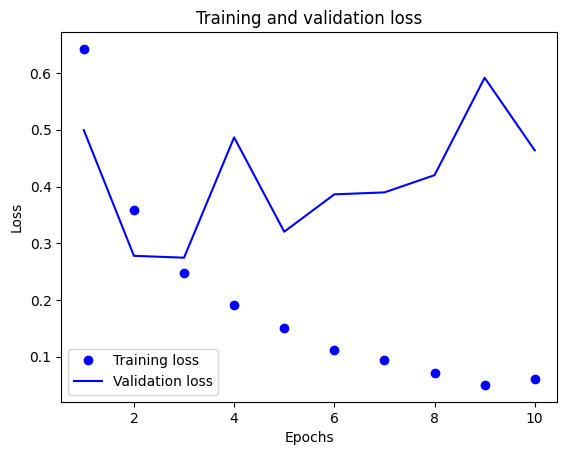

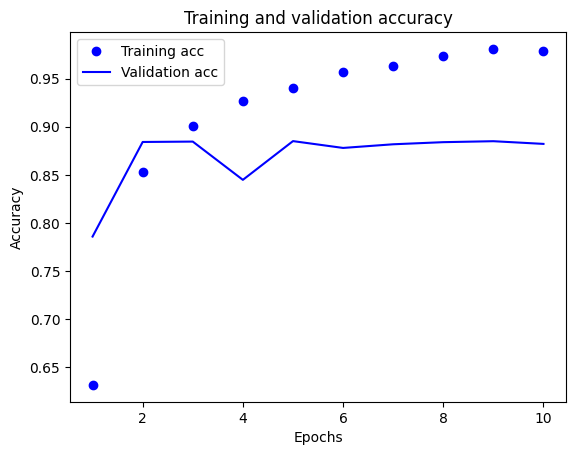

782/782 [==============================] - 4s 5ms/step - loss: 0.4969 - accuracy: 0.8738
[0.49690675735473633, 0.8737599849700928]
Accuracy: 87.38%


In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer=RMSprop(learning_rate=0.003)
model7 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model7.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])
history7 = model7.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict7 = history7.history
history_dict7.keys()

import matplotlib.pyplot as plt
history_dict7 = history7.history
loss_values = history_dict7["loss"]
val_loss_values = history_dict7["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict7["accuracy"]
val_acc = history_dict7["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

results7 = model7.evaluate(x_test, y_test)
print(results7)
print("Accuracy: %.2f%%" % (results7[1]*100))

**Retraining a model from scratch :  Model 8**

Epoch 1/10
30/30 [==============================] - 6s 153ms/step - loss: 0.6724 - accuracy: 0.6141 - val_loss: 0.4754 - val_accuracy: 0.7717
Epoch 2/10
30/30 [==============================] - 5s 182ms/step - loss: 0.3684 - accuracy: 0.8460 - val_loss: 0.3757 - val_accuracy: 0.8479
Epoch 3/10
30/30 [==============================] - 5s 156ms/step - loss: 0.2613 - accuracy: 0.8969 - val_loss: 0.3814 - val_accuracy: 0.8559
Epoch 4/10
30/30 [==============================] - 4s 127ms/step - loss: 0.2049 - accuracy: 0.9211 - val_loss: 0.3190 - val_accuracy: 0.8855
Epoch 5/10
30/30 [==============================] - 3s 109ms/step - loss: 0.1513 - accuracy: 0.9428 - val_loss: 0.3197 - val_accuracy: 0.8801
Epoch 6/10
30/30 [==============================] - 5s 169ms/step - loss: 0.1110 - accuracy: 0.9581 - val_loss: 0.4289 - val_accuracy: 0.8843
Epoch 7/10
30/30 [==============================] - 5s 175ms/step - loss: 0.0890 - accuracy: 0.9659 - val_loss: 0.4792 - val_accuracy: 0.8831
Epoch 

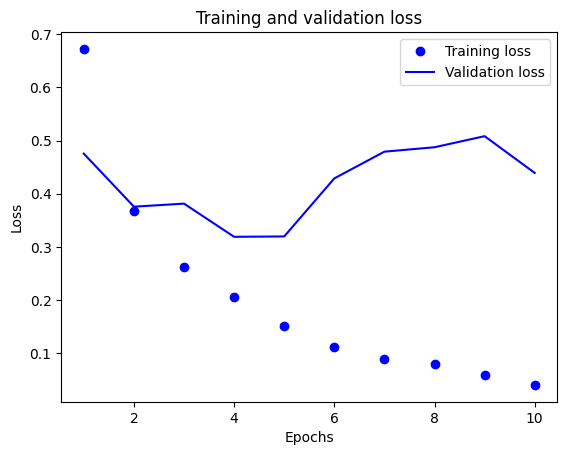

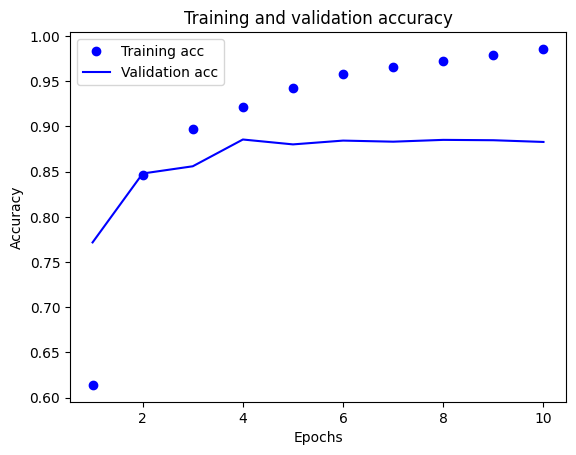

782/782 [==============================] - 4s 5ms/step - loss: 0.4678 - accuracy: 0.8764
[0.4678177833557129, 0.8763599991798401]
Accuracy: 87.64%


In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer=RMSprop(learning_rate=0.003)
model8 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model8.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])
history8 = model8.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict8 = history8.history
history_dict8.keys()

import matplotlib.pyplot as plt
history_dict8 = history8.history
loss_values = history_dict8["loss"]
val_loss_values = history_dict8["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict8["accuracy"]
val_acc = history_dict8["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

results8 = model8.evaluate(x_test, y_test)
print(results8)
print("Accuracy: %.2f%%" % (results8[1]*100))

**Retraining a model from scratch :  Model 9**




Epoch 1/10
30/30 [==============================] - 8s 213ms/step - loss: 0.6744 - accuracy: 0.5862 - val_loss: 0.5919 - val_accuracy: 0.7816
Epoch 2/10
30/30 [==============================] - 8s 267ms/step - loss: 0.4642 - accuracy: 0.8247 - val_loss: 0.3016 - val_accuracy: 0.8694
Epoch 3/10
30/30 [==============================] - 6s 214ms/step - loss: 0.2902 - accuracy: 0.8850 - val_loss: 0.2920 - val_accuracy: 0.8757
Epoch 4/10
30/30 [==============================] - 7s 246ms/step - loss: 0.2127 - accuracy: 0.9167 - val_loss: 0.2869 - val_accuracy: 0.8813
Epoch 5/10
30/30 [==============================] - 10s 351ms/step - loss: 0.1712 - accuracy: 0.9339 - val_loss: 0.3077 - val_accuracy: 0.8817
Epoch 6/10
30/30 [==============================] - 6s 189ms/step - loss: 0.1122 - accuracy: 0.9577 - val_loss: 0.4198 - val_accuracy: 0.8795
Epoch 7/10
30/30 [==============================] - 10s 346ms/step - loss: 0.0972 - accuracy: 0.9665 - val_loss: 0.4534 - val_accuracy: 0.8801
Epoc

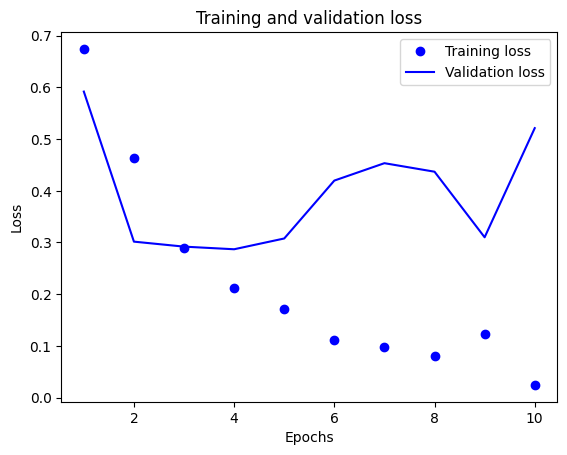

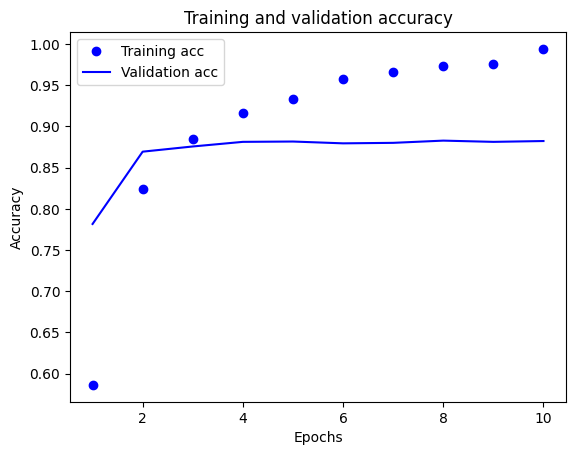

782/782 [==============================] - 7s 9ms/step - loss: 0.5477 - accuracy: 0.8758
[0.5477199554443359, 0.8758400082588196]
Accuracy: 87.58%


In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer=RMSprop(learning_rate=0.003)
model9 = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model9.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])
history9 = model9.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict9 = history9.history
history_dict9.keys()

import matplotlib.pyplot as plt
history_dict9 = history9.history
loss_values = history_dict9["loss"]
val_loss_values = history_dict9["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict9["accuracy"]
val_acc = history_dict9["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

results9 = model9.evaluate(x_test, y_test)
print(results9)
print("Accuracy: %.2f%%" % (results9[1]*100))

**Retraining a model from scratch :  Model 10**




Epoch 1/5
30/30 [==============================] - 6s 154ms/step - loss: 0.6843 - accuracy: 0.6347 - val_loss: 0.5026 - val_accuracy: 0.8442
Epoch 2/5
30/30 [==============================] - 4s 127ms/step - loss: 0.3944 - accuracy: 0.8443 - val_loss: 0.3928 - val_accuracy: 0.8174
Epoch 3/5
30/30 [==============================] - 4s 150ms/step - loss: 0.2728 - accuracy: 0.8931 - val_loss: 0.3221 - val_accuracy: 0.8673
Epoch 4/5
30/30 [==============================] - 5s 177ms/step - loss: 0.2061 - accuracy: 0.9189 - val_loss: 0.2947 - val_accuracy: 0.8838
Epoch 5/5
30/30 [==============================] - 4s 127ms/step - loss: 0.1547 - accuracy: 0.9392 - val_loss: 0.3842 - val_accuracy: 0.8855


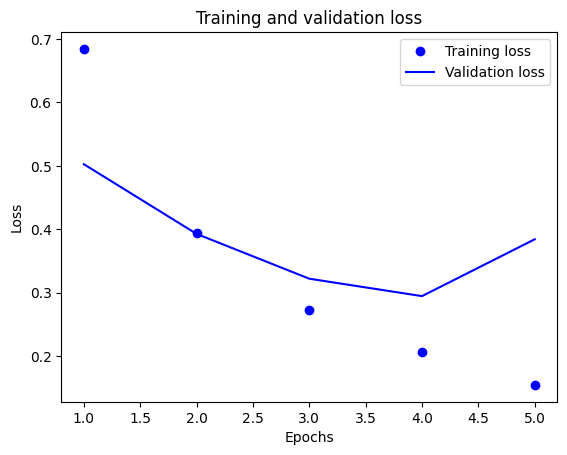

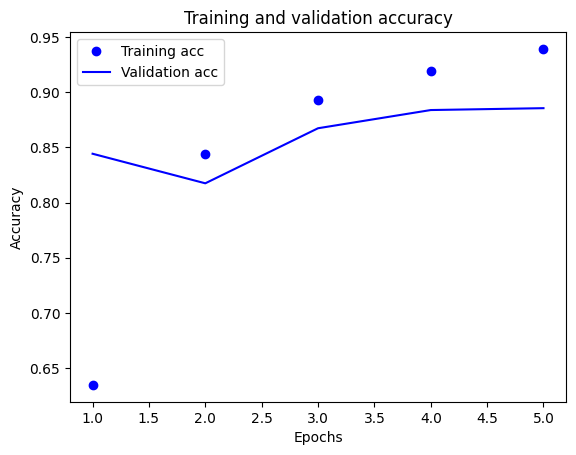

782/782 [==============================] - 5s 6ms/step - loss: 0.3927 - accuracy: 0.8787
[0.3927246928215027, 0.8786799907684326]
Accuracy: 87.87%


In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer=RMSprop(learning_rate=0.003)
model10 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model10.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])
history10 = model10.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict10 = history10.history
history_dict10.keys()

import matplotlib.pyplot as plt
history_dict10 = history10.history
loss_values = history_dict10["loss"]
val_loss_values = history_dict10["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict10["accuracy"]
val_acc = history_dict10["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

results10 = model10.evaluate(x_test, y_test)
print(results10)
print("Accuracy: %.2f%%" % (results10[1]*100))

**Retraining a model from scratch :  Model 11**




Epoch 1/5
30/30 [==============================] - 8s 227ms/step - loss: 1.8253 - accuracy: 0.5966 - val_loss: 0.8406 - val_accuracy: 0.6696
Epoch 2/5
30/30 [==============================] - 4s 136ms/step - loss: 0.6607 - accuracy: 0.7833 - val_loss: 0.5228 - val_accuracy: 0.8295
Epoch 3/5
30/30 [==============================] - 3s 111ms/step - loss: 0.5404 - accuracy: 0.8281 - val_loss: 0.4771 - val_accuracy: 0.8676
Epoch 4/5
30/30 [==============================] - 3s 113ms/step - loss: 0.5027 - accuracy: 0.8487 - val_loss: 0.4521 - val_accuracy: 0.8740
Epoch 5/5
30/30 [==============================] - 5s 183ms/step - loss: 0.5136 - accuracy: 0.8405 - val_loss: 0.4523 - val_accuracy: 0.8746


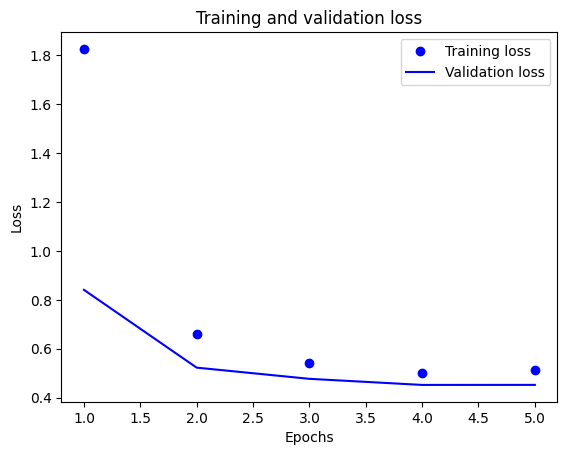

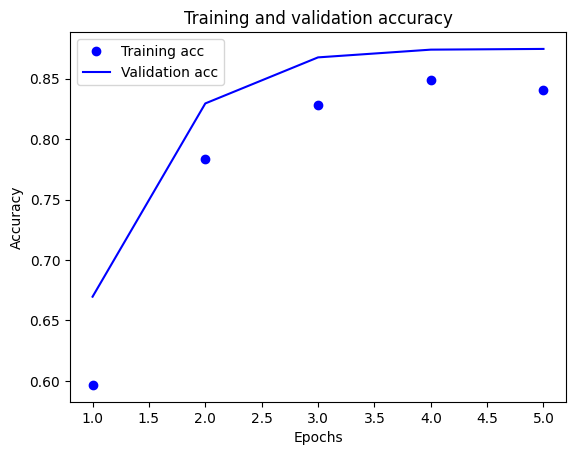

782/782 [==============================] - 4s 6ms/step - loss: 0.4592 - accuracy: 0.8708
[0.4591529667377472, 0.8707600235939026]
Accuracy: 87.08%


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers, regularizers
optimizer=RMSprop(learning_rate=0.003)
model10 = keras.Sequential([
    layers.Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.1),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model10.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])
history10 = model10.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict10 = history10.history
history_dict10.keys()

import matplotlib.pyplot as plt
history_dict10 = history10.history
loss_values = history_dict10["loss"]
val_loss_values = history_dict10["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict10["accuracy"]
val_acc = history_dict10["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

results10 = model10.evaluate(x_test, y_test)
print(results10)
print("Accuracy: %.2f%%" % (results10[1]*100))

**SUMMARY**

As seen from the above code, I tried various variations of model and I have kept best 10 models for which I was seeing a better and comparable accuracy. Lets start from the begining and let me highlight the things which I did to get better accuracy.

Starting from the Model 1, I just used the same model given in the github link so as to get hands on running the model and keeping it as a base and we see that it acheives a `training accuracy of 97.7%, validation accuracy of 87.9% and testing accuracy of 87.08% `which i think itself is pretty decent.

On top of this model, I add a dense layer to the model and also change number of neurons to 64,32,16,1 and this acheives a `training accuracy of 98.3%, validation accuracy of 87.45% and testing accuracy of 86.47% `which is not as good as previous model.

Then further experiments are conducted on differnet number of layers and different number of neurons for each layer. These variations are captured in Model 3,4,5,6 with the below data.

```
Model3 : Training Accuracy - 98.3%, Validation Accuracy - 87.82%, Testing Accuracy - 86.73%
Model4 : Training Accuracy - 98.9%, Validation Accuracy - 87.14%, Testing Accuracy - 86.28%
Model5 : Training Accuracy - 99.9%, Validation Accuracy - 86.29%, Testing Accuracy - 85.23%%
```

This suggests that just increasing the size or umber of layers isnot increasing model accuracy. Also we can see from graphs and training accuracy that overfitting is happening. So I further tried more expereiments with learning rate and droputs and optimizers.

Moving forward, as overfitting is happening, I used dropouts and learning rates and different optimizers to avoid overfitting. In this model the training loss has decreased with a great difference. The training accuracy has also improved.
So Model 6,7,8,9 are run with different variations of dropouts, learning rates and optimizers such as ADAM and RMSProp. Below is the data.

```
Model6 : Training Accuracy - 99.8%, Validation Accuracy - 88.1%, Testing Accuracy - 87.03%
Model7 : Training Accuracy - 97.87%, Validation Accuracy - 88.2%, Testing Accuracy - 87.38%
Model8 : Training Accuracy - 98.57%, Validation Accuracy - 88.28%, Testing Accuracy - 87.64%
Model9 : Training Accuracy - 99.41%, Validation Accuracy - 88.2%, Testing Accuracy - 87.58%
```

Here we see the increase in the accuracy infact best accuracy till now. Seeing the results and comparing all three accuracies to base model and other models, it is clear that overfitting is prevented and best accuracy is seen for Model 8 with Training Accuracy of 98.57%, Validation of 88.3% and Testing of 87.64% and improvement with the base model is by 0.6% in testing.

Even after this, I tred different variations od droputs and learning rates but the model perfomed almost similarly. So with model 8, I still felt that saturation is coming around epoch 5 and after that its just training accuracy is increasing and overfitting is happening so In last model, I tried for epochs 5 and i get best model accuracy till now as below:

```
Model10 : Training Accuracy - 94%, Validation Accuracy - 88.6%, Testing Accuracy - 87.87%
```

Also tried to add one more thing of regularizers to the model and that is show in Model 11. This was added after some research on how to make models better. And adding L2 regularization has proved to help improve the model. Although it didnt give better performance but it is comparable.

In the conclusion, we see that **Model 8 and Model 10 performs best compared to Model1 and startegies applied in these models are increase in layers and number of neurons along with ensuring that overfitting is stopped by pruing and adding droputs and learning rate with ADAM and RMSProp Optimizer**.

